In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [4]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['survived'] = df['Survived']

In [5]:
meanAge = X['age'].mean()
X['age'] = X['age'].fillna(meanAge)

In [6]:
y = X['survived']
X = X.drop(['survived'], axis=1)

In [9]:
X['female'] = pd.get_dummies(X.sex)['female']

In [11]:
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))
X = X.drop(['pclass_3', 'pclass', 'sex'], axis=1)

In [12]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
X

array([[-0.5924806 ,  0.43279337, -0.47367361, -0.73769513, -0.56568542,
        -0.51015154],
       [ 0.63878901,  0.43279337, -0.47367361,  1.35557354,  1.76776695,
        -0.51015154],
       [-0.2846632 , -0.4745452 , -0.47367361,  1.35557354, -0.56568542,
        -0.51015154],
       ..., 
       [ 0.        ,  0.43279337,  2.00893337,  1.35557354, -0.56568542,
        -0.51015154],
       [-0.2846632 , -0.4745452 , -0.47367361, -0.73769513,  1.76776695,
        -0.51015154],
       [ 0.17706291, -0.4745452 , -0.47367361, -0.73769513, -0.56568542,
        -0.51015154]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [16]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [19]:
print '\n\n---Logistic Model---'
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print 'logistic AUC = {}'.format(logit_roc_auc)
print classification_report(y_test, model.predict(X_test))



---Logistic Model---
logistic AUC = 0.807722007722
             precision    recall  f1-score   support

          0       0.82      0.89      0.85       105
          1       0.82      0.73      0.77        74

avg / total       0.82      0.82      0.82       179



In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

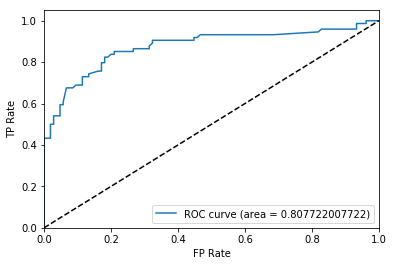

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {})'.format(logit_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.legend(loc='lower right')
plt.show()